<a href="https://colab.research.google.com/github/sarthaksc/Cancer-prediction-application/blob/main/Cancer_Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns

In [33]:
path = '/gdrive/My Drive/Colab Notebooks/breast_cancer_wisconsin_data.csv'
raw_data = pd.read_csv(path)
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
raw_data = raw_data.drop(columns=['id','Unnamed: 32'])
#raw_data = raw_data.fillna({"Age": raw_data["Age"].mean()})
raw_data.isnull().sum(axis=0)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder_diag = LabelEncoder()
raw_data["diagnosis"] = labelencoder_diag.fit_transform(raw_data["diagnosis"])


raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
Xcol = raw_data.drop("diagnosis",axis=1)
ycol = raw_data["diagnosis"]




In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(Xcol,ycol, test_size=0.25,random_state =20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [38]:

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini',)

In [39]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
label = 'diagnosis'
features = Xcol.columns
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [41]:
from sklearn.tree import export_graphviz
from pydotplus import graphviz as gr

export_graphviz(dtree, out_file = 'dtree.dot', feature_names=features, class_names=label, rounded = True, precision = 1, filled = True,special_characters = True,)

In [42]:
ypred_train = dtree.predict(x_train)
ypred_test = dtree.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train,ypred_train)
test_accuracy = accuracy_score(y_test,ypred_test)

print('training Accuracy = {} %'.format(training_accuracy*100))
print('test accuracy = {}'.format(test_accuracy*100))


training Accuracy = 100.0 %
test accuracy = 90.20979020979021


In [44]:
from sklearn.metrics import classification_report
print('                           Training data')
print(classification_report(y_train, ypred_train))
print('*********************************************************')
print('                                   test_data')
print(classification_report(y_test,ypred_test))

                           Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       155

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

*********************************************************
                                   test_data
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        86
           1       0.84      0.93      0.88        57

    accuracy                           0.90       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143



In [45]:
path = dtree.cost_complexity_pruning_path(x_train,y_train)

In [46]:
alphas = path.ccp_alphas
print(alphas)

[0.         0.00232963 0.00233755 0.00352113 0.00352113 0.00449071
 0.0045892  0.00807788 0.00984786 0.01055625 0.01693903 0.04683338
 0.32410279]


[0.         0.00465927 0.00933438 0.0128555  0.01637663 0.02086734
 0.02545655 0.03353443 0.04338228 0.07505102 0.09199005 0.13882343
 0.46292623]


Text(0.5, 1.0, 'total impurities vs effective alpha fir taining set')

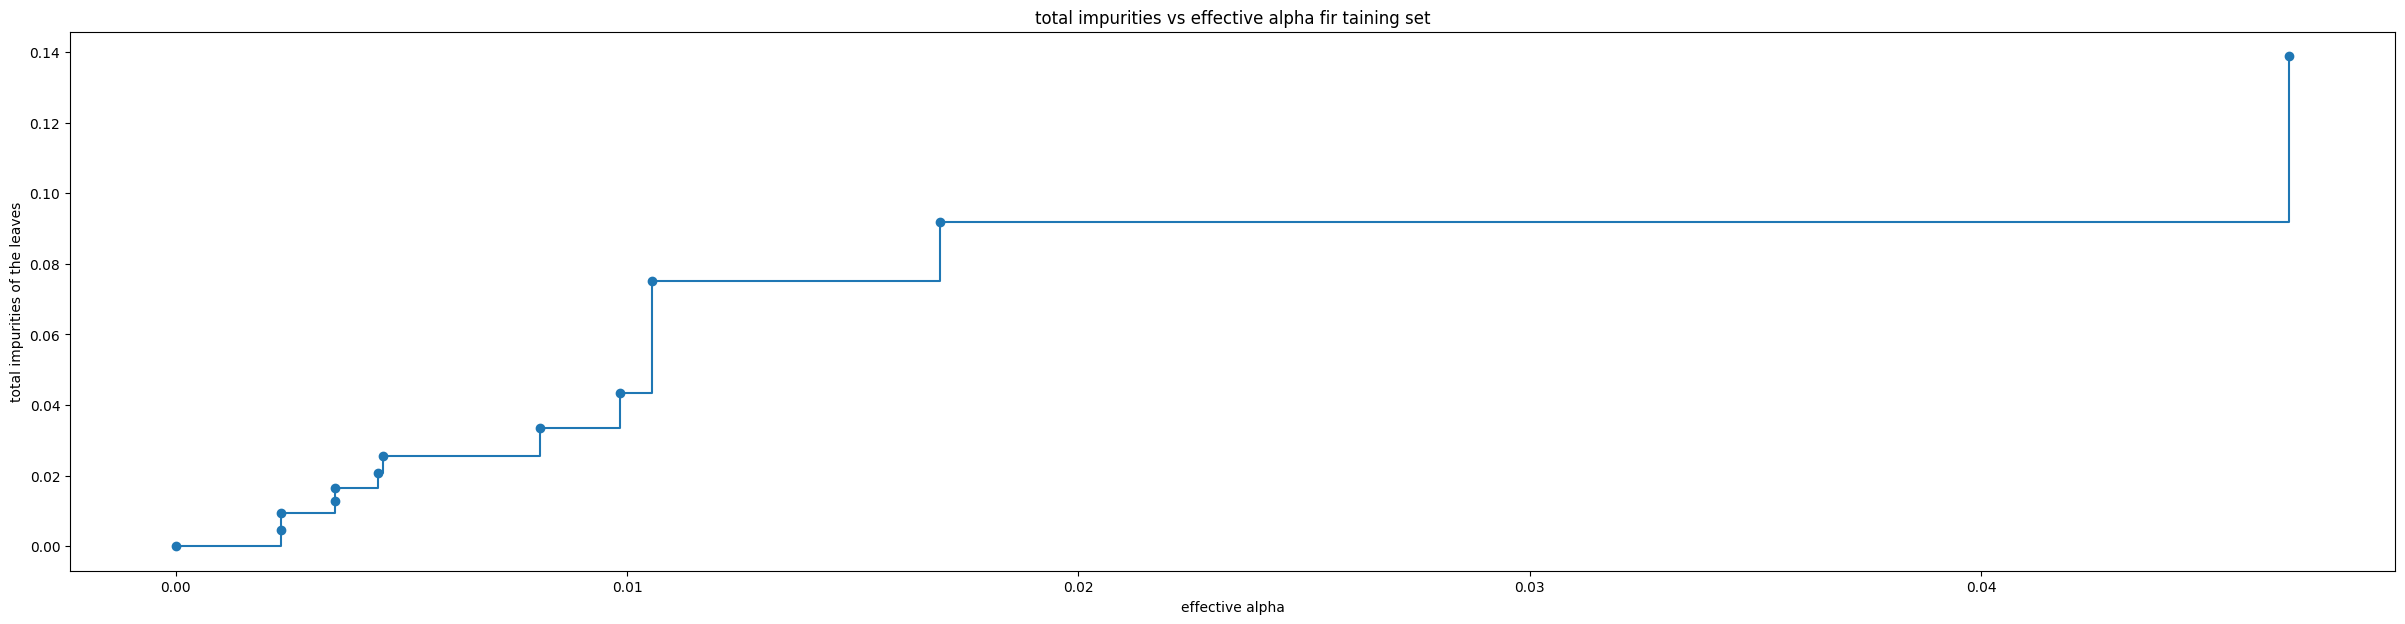

In [47]:
impurities = path.impurities
print(path.impurities)

fig, ax = plt.subplots(figsize=(30,7))
ax.plot(alphas[:-1],impurities[:-1],marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurities of the leaves")
ax.set_title("total impurities vs effective alpha fir taining set")
